# Assignment 2
### Understanding Uncertainty
### Due 9/12

In [25]:
import pandas as pd
liq = pd.read_csv('data/iowa.csv')
liq

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159899,INV-20689000058,07/17/2019,2565,HY-VEE FOOD STORE #1636 / SPENCER,51301,AMERICAN CORDIALS & LIQUEURS,LUXCO INC,76488,PARAMOUNT AMARETTO,1750,8.07,12.11,6,72.66
159900,S05071400061,04/16/2012,3583,MAC'S LIQUOR AND VIDEOS,50060,COFFEE LIQUEURS,PERNOD RICARD USA/AUSTIN NICHOLS,67527,KAHLUA COFFEE LIQUEUR,1000,14.81,22.22,1,22.22
159901,INV-22880300009,10/29/2019,3896,SMOKIN' JOE'S #18 TOBACCO AND LIQUOR OUTLET,52240,IMPORTED DRY GINS,DIAGEO AMERICAS,28866,TANQUERAY GIN,750,13.50,20.25,2,40.50
159902,INV-58180900067,05/05/2023,4057,TEQUILA'S LIQUOR STORE,50316,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY DISTILLERY LLC,80363,OLE SMOKY BANANA PUDDING CREAM MOONSHINE,750,13.00,19.50,3,58.50


1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

# 1 Response
- Profit can be defined by per unit, per ounce, and total difference between the bottle sold value and the bottle cost. I am going to define profitability by how much total value is gained by the difference of all bottles sold rather than the % of per unit/volume because more money means you can do more and thus be more useful (more money).
- I am going to create new columns of marginal profit and total profit to show profitability, but use groupby for total.

In [26]:
liq = liq.copy()

In [31]:
# liq['Profit Margin'] = liq['State Bottle Retail'] - liq['State Bottle Cost']
# liq['Total Profit'] = liq['Sale (Dollars)'] - liq['Bottles Sold'] * liq['State Bottle Cost']
# liq
liq_c = liq.assign(
        ProfitMargin = liq["State Bottle Retail"] - liq["State Bottle Cost"],
        TotalProfit  = liq["Sale (Dollars)"] - liq["Bottles Sold"] * liq["State Bottle Cost"]
    ).groupby("Item Description", as_index=False).agg({
        "ProfitMargin": "mean",     # avg margin per bottle
        "TotalProfit": "sum",       # total profit across all sales
        "Bottles Sold": "sum",      # optional extra metrics
        "Sale (Dollars)": "sum"
    }).sort_values("TotalProfit", ascending=False).head(10)
liq_c

,Item Description,ProfitMargin,TotalProfit,Bottles Sold,Sale (Dollars)
5022,TITOS HANDMADE VODKA,5.969286,361583.84,57263,1089534.02
636,BLACK VELVET,3.433353,274024.45,76184,817065.33
1854,FIREBALL CINNAMON WHISKEY,3.749808,187554.54,97308,562508.92
1323,CROWN ROYAL,8.305232,160402.53,19817,482125.60
1358,CROWN ROYAL REGAL APPLE,7.881308,122614.70,16250,368257.76
1022,CAPTAIN MORGAN SPICED RUM,5.908933,121783.66,20822,363886.90
2349,HAWKEYE VODKA,2.364754,116585.84,53675,349088.98
992,CAPTAIN MORGAN ORIGINAL SPICED,4.921577,112006.88,22750,336110.89
2564,JACK DANIELS OLD #7 BLACK LABEL,9.200789,111168.67,12592,334087.57
2376,HENNESSY VS,6.519926,107313.27,18855,324075.74


<Axes: xlabel='Item Description'>

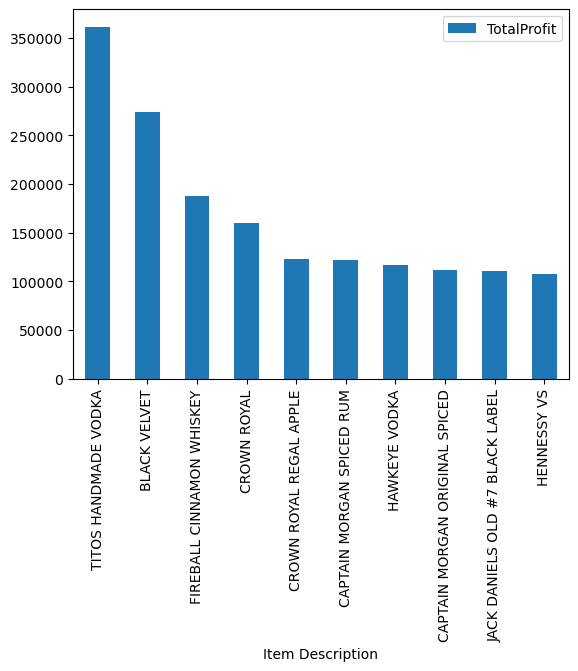

In [32]:
# plot the TotalProfit in the liq
import matplotlib.pyplot as plt

# create a copy of the liq datafram that is sorted by the total profit
# liq_c = liq.sort_values(by="Total Profit", ascending=False).copy()[0:10]
liq_c.plot(kind='bar', x='Item Description', y='TotalProfit')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

# 2 Response
- Value Error
- A new 2-D array is output ([[-1, -4],[ 1, -2],[ 3,  0]])
- The numbers are the same but rotated around the diagonal ([[-1,  1,  3], [-4, -2,  0]])
- Wrote
- (1, -1) -> put everything in one row with as many columns as needed, (-1, 1) is the opposite with all in one column.
- - By flipping column and rows to one or the other as with y and x, a 2 is created by running all perms of subtraction.

In [33]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

x - y 

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [34]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [35]:
x.reshape(1,-1) - y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

In [43]:
t = []
for i in range(len(x)):
    s = []
    for j in range(len(y)):
        s.append(x[i] - y[j])
    t.append(s)
print(t)
t = []
for j in range(len(y)):
    s = []
    for i in range(len(x)):
        s.append(x[i] - y[j])
    t.append(s)
print(t)

[[np.int64(-1), np.int64(-4)], [np.int64(1), np.int64(-2)], [np.int64(3), np.int64(0)]]
[[np.int64(-1), np.int64(1), np.int64(3)], [np.int64(-4), np.int64(-2), np.int64(0)]]


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

# Response to 3
- x is = 3 is the first one
- $1 - \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$, the 1 represents all values. When removing all x less than or equal to z, you are left with strictly only values greater than z, thus $\mathbb{I}\{ x > z \}$
- I didn't know whether to make my own or use the provided imports, so I did both below.
- As the number of samples N increases in size, the ECDF becomes more smooth and "S" shaped showing the expected distribution after starting with a few blantant steps.

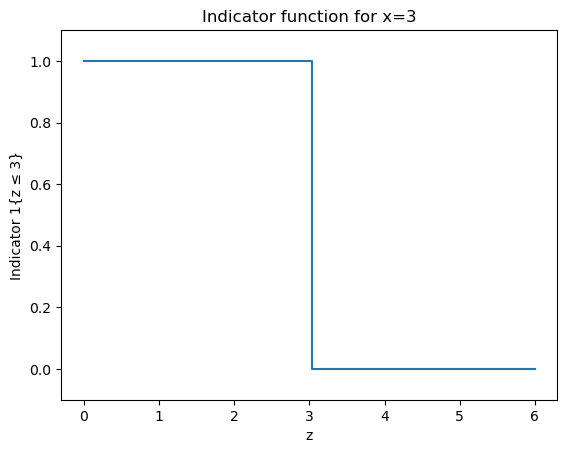

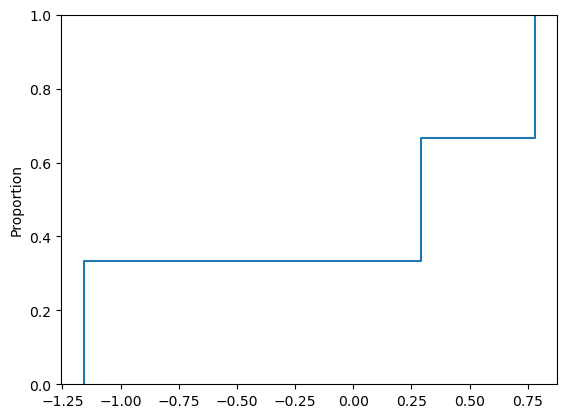

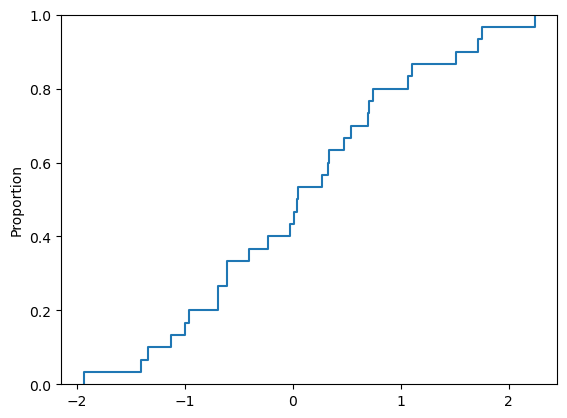

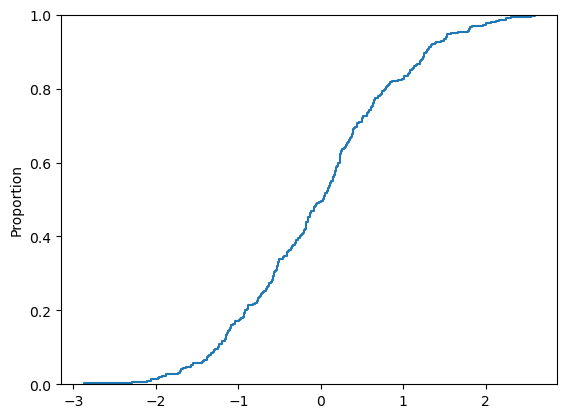

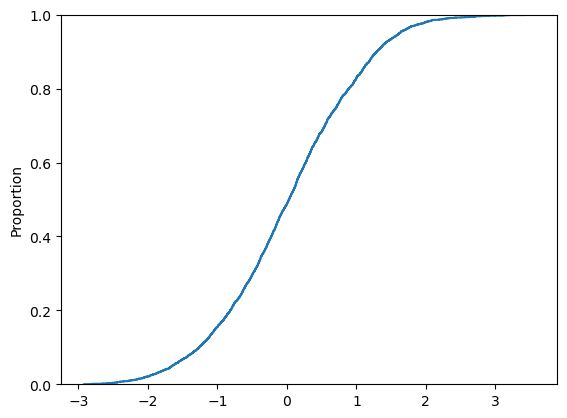

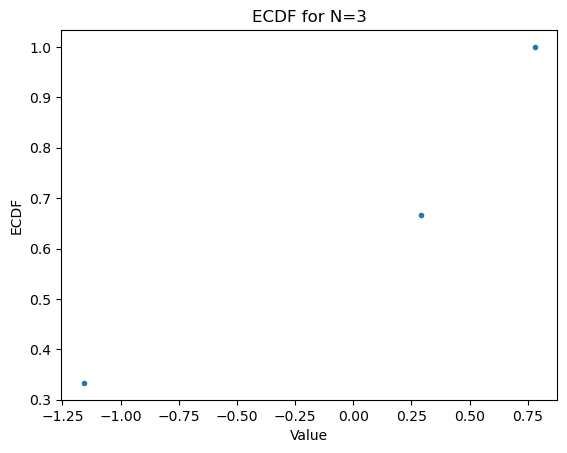

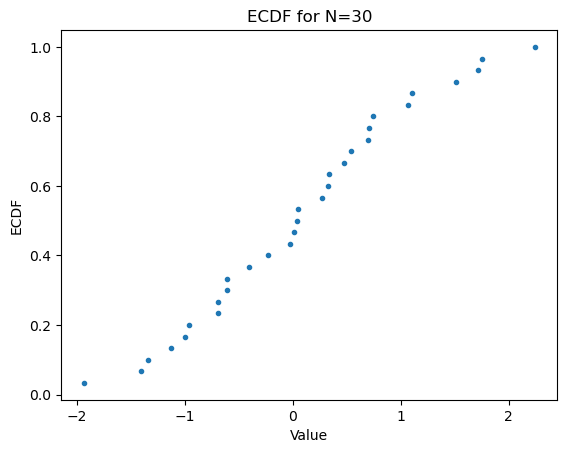

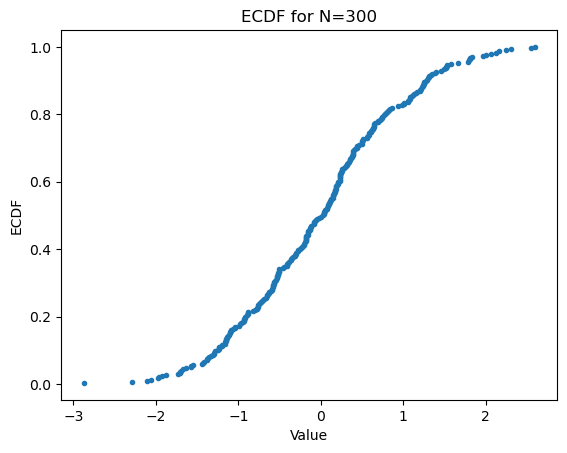

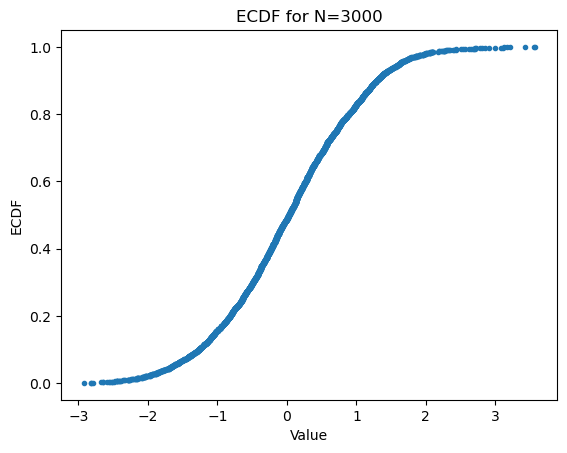

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#1
x = 3
z = np.linspace(0, 6, 100)              # z
indicator = (z <= x).astype(int)        # 1 <= 3

plt.step(z, indicator, where="post")
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("Indicator 1{z ≤ 3}")
plt.title("Indicator function for x=3")
plt.show()

#Original 3 
rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    sns.ecdfplot(X)
    plt.show()

# Own function for 3
def ecdf(data):
    x = np.sort(data)
    n = len(x)
    y = np.arange(1, n+1) / n
    return x, y

rng = np.random.default_rng(100)

for N in (3, 30, 300, 3000):
    X = rng.normal(0, 1, N)
    x_ecdf, y_ecdf = ecdf(X)
    plt.plot(x_ecdf, y_ecdf, marker='.', linestyle='none')
    plt.title(f"ECDF for N={N}")
    plt.xlabel("Value")
    plt.ylabel("ECDF")
    plt.show()


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [58]:
import math 
def quantile(values: list[float], q: float) -> float:
    xs = sorted(v for v in values if pd.notna(v))
    n = len(xs)
    idx = q * (n - 1)
    lo, hi = math.floor(idx), math.ceil(idx)
    if lo == hi:
        return xs[lo]
    frac = idx - lo
    return (1 - frac) * xs[lo] + frac * xs[hi]

In [52]:
def iqr_and_whiskers(values: list[float]) -> dict[str, float]:
    xs = sorted(v for v in values if pd.notna(v))
    q1 = quantile(xs, 0.25)
    q3 = quantile(xs, 0.75)
    iqr = q3 - q1
    low_lim  = q1 - 1.5 * iqr
    high_lim = q3 + 1.5 * iqr
    low_adj  = next((x for x in xs if x >= low_lim), xs[0])
    high_adj = next((x for x in reversed(xs) if x <= high_lim), xs[-1])
    return {
        "q1": q1, "q3": q3, "iqr": iqr,
        "low_limit": low_lim, "high_limit": high_lim,
        "low_adjacent": low_adj, "high_adjacent": high_adj
    }


In [53]:
def five_number_summary(values: list[float]) -> dict[str, float]:
    xs = sorted(v for v in values if pd.notna(v))
    q1 = quantile(xs, 0.25)
    med = quantile(xs, 0.50)
    q3 = quantile(xs, 0.75)
    w = iqr_and_whiskers(xs)
    return {
        "min": xs[0],
        "q1": q1,
        "median": med,
        "q3": q3,
        "max": xs[-1],
        "low_adjacent": w["low_adjacent"],
        "high_adjacent": w["high_adjacent"]
    }

In [54]:
def is_outlier(values: list[float]) -> list[bool]:
    xs = list(values)
    w = iqr_and_whiskers(xs)
    low, high = w["low_limit"], w["high_limit"]
    return [ (pd.notna(v) and (v < low or v > high)) for v in xs ]

Five-number summary & boxplot whiskers:
{'min': 4.3, 'q1': 5.1, 'median': 5.8, 'q3': 6.4, 'max': 7.9, 'low_adjacent': 4.3, 'high_adjacent': 7.9}

IQR & whiskers:
{'q1': 5.1, 'q3': 6.4, 'iqr': 1.3000000000000007, 'low_limit': 3.1499999999999986, 'high_limit': 8.350000000000001, 'low_adjacent': 4.3, 'high_adjacent': 7.9}

Outlier count: 0


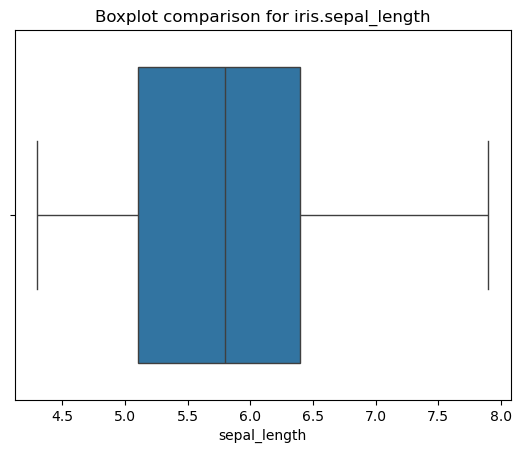


Pandas describe():
              count      mean       std  min  25%  50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.8  6.4  7.9
Five-number summary & boxplot whiskers:
{'min': 4.3, 'q1': 5.1, 'median': 5.8, 'q3': 6.4, 'max': 7.9, 'low_adjacent': 4.3, 'high_adjacent': 7.9}


In [ ]:
df = sns.load_dataset("iris")
col = "sepal_length"
vals = df[col]

print("Five-number summary & boxplot whiskers:")
print(five_number_summary(vals))

print("\nIQR & whiskers:")
print(iqr_and_whiskers(vals))

print("\nOutlier count:", sum(is_outlier(vals)))

sns.boxplot(x=vals, orient="h")
plt.title(f"Boxplot comparison for iris.{col}")
plt.xlabel(col)
plt.show()

print("\nPandas describe():")
print(df[[col]].describe().T)
print("Five-number summary & boxplot whiskers:")
print(five_number_summary(vals))

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

- KDE appears to overfit with lower h and under fit with higher h

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CHAT SHOWED ME WTF THESE ARE and the easiest way to be concise
def k_gaussian(u):      return (1/np.sqrt(2*np.pi)) * np.exp(-0.5*u*u)
def k_epanechnikov(u):  return 0.75 * np.clip(1 - u*u, 0, None)
def k_uniform(u):       return 0.5 * ((-1 <= u) & (u <= 1)).astype(float)
def k_triangular(u):    return np.clip(1 - np.abs(u), 0, None)

KERNELS = {
    "gaussian": k_gaussian,
    "epanechnikov": k_epanechnikov,
    "uniform": k_uniform,
    "triangular": k_triangular,
}

def kde(x, z, h, kernel="gaussian"):
    x = np.asarray(x, float)
    z = np.asarray(z, float)
    u = (x[None, :] - z[:, None]) / h 
    k = KERNELS[kernel](u)
    return (k.sum(axis=1) / (len(x) * h))

def kde_plot(x, h, kernel="gaussian", grid=None, ax=None, label=None):
    if grid is None:
        pad = 0.2 * np.nanstd(x)
        grid = np.linspace(np.nanmin(x)-pad, np.nanmax(x)+pad, 400)
    fhat = kde(x, grid, h, kernel)
    ax = ax or plt.gca()
    ax.plot(grid, fhat, label=label or f"{kernel}, h={h:.3g}")
    return ax

Silverman normal-reference rule: h = 0.9 * min(sd, IQR/1.34) * n^(-1/5)

In [70]:
def plugin_bandwidth(x):
    x = pd.Series(x).dropna().to_numpy()
    n = len(x)
    if n < 2: raise ValueError("Need at least 2 points")
    sd = np.std(x, ddof=1)
    q75, q25 = np.percentile(x, [75, 25])
    iqr = q75 - q25
    sigma = min(sd, iqr/1.34) if iqr > 0 else sd
    return 0.9 * sigma * n**(-1/5)

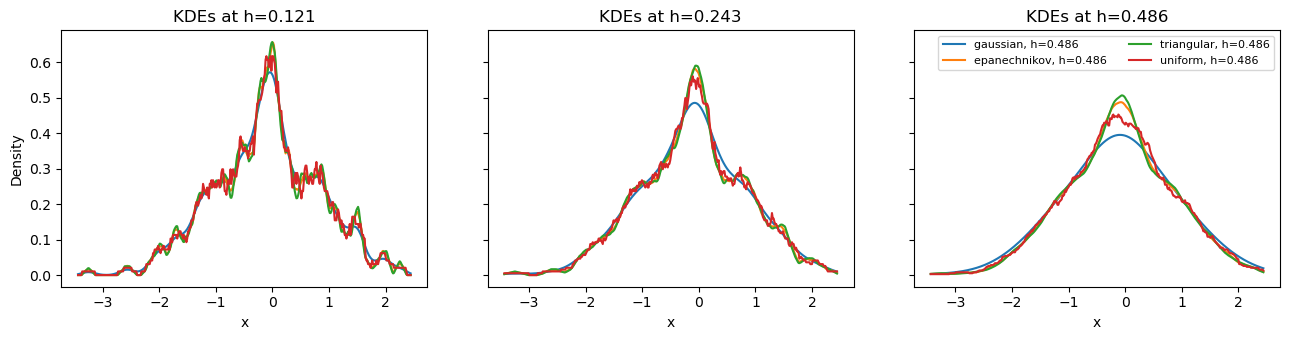

In [71]:
rng = np.random.default_rng(7)
x = rng.normal(loc=0, scale=1, size=400)

h_star = plugin_bandwidth(x)             
hs = [0.5*h_star, h_star, 2*h_star]   

fig, axes = plt.subplots(1, 3, figsize=(13, 3.5), sharey=True)
for ax, h in zip(axes, hs):
    for ker in ("gaussian", "epanechnikov", "triangular", "uniform"):
        kde_plot(x, h, kernel=ker, ax=ax)
    ax.set_title(f"KDEs at h={h:.3g}")
    ax.set_xlabel("x")
axes[0].set_ylabel("Density")
axes[-1].legend(loc="upper right", ncols=2, fontsize=8)
plt.tight_layout()
plt.show()